=== 验证Python环境 ===
Python路径: /Users/limengyan/anaconda3/envs/alb_env/bin/python
✅ numpy: 2.2.6
✅ OpenCV: 4.12.0
✅ PyTorch: 2.9.1 (CUDA: False)
✅ Albumentations: 1.3.0

=== 最终环境信息 ===
Albumentations: 1.3.0
NumPy: 2.2.6
PyTorch: 2.9.1
Device: cpu

✅ 加载数据集：3834 张图片

🚀 开始训练 No Augmentation（resnet18）...


No Augmentation resnet18 Epoch 3/3: 100%|█████| 384/384 [01:09<00:00,  5.52it/s]


📊 评估 No Augmentation（resnet18）...
✅ resnet18 - No Augmentation 准确率: 88.92%


✅ 加载数据集：3834 张图片

🚀 开始训练 Basic Augmentation（resnet18）...


Basic Augmentation resnet18 Epoch 3/3: 100%|██| 384/384 [01:11<00:00,  5.40it/s]


📊 评估 Basic Augmentation（resnet18）...
✅ resnet18 - Basic Augmentation 准确率: 88.40%


✅ 加载数据集：3834 张图片
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/limengyan/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|█████████████████████████████████████████| 528M/528M [09:48<00:00, 940kB/s]



🚀 开始训练 No Augmentation（vgg16）...


No Augmentation vgg16 Epoch 3/3: 100%|████████| 384/384 [04:32<00:00,  1.41it/s]


📊 评估 No Augmentation（vgg16）...
✅ vgg16 - No Augmentation 准确率: 90.61%


✅ 加载数据集：3834 张图片

🚀 开始训练 Basic Augmentation（vgg16）...


Basic Augmentation vgg16 Epoch 3/3: 100%|█████| 384/384 [04:35<00:00,  1.39it/s]


📊 评估 Basic Augmentation（vgg16）...
✅ vgg16 - Basic Augmentation 准确率: 88.14%


✅ 加载数据集：3834 张图片
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /Users/limengyan/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████████████████████████████████| 13.6M/13.6M [00:03<00:00, 4.72MB/s]



🚀 开始训练 No Augmentation（mobilenet_v2）...


No Augmentation mobilenet_v2 Epoch 3/3: 100%|█| 384/384 [01:09<00:00,  5.50it/s]


📊 评估 No Augmentation（mobilenet_v2）...
✅ mobilenet_v2 - No Augmentation 准确率: 80.44%


✅ 加载数据集：3834 张图片

🚀 开始训练 Basic Augmentation（mobilenet_v2）...


Basic Augmentation mobilenet_v2 Epoch 1/3: 100%|█| 384/384 [01:11<00:00,  5.34it
Basic Augmentation mobilenet_v2 Epoch 2/3: 100%|█| 384/384 [01:11<00:00,  5.38it
Basic Augmentation mobilenet_v2 Epoch 3/3: 100%|█| 384/384 [01:11<00:00,  5.36it


📊 评估 Basic Augmentation（mobilenet_v2）...
✅ mobilenet_v2 - Basic Augmentation 准确率: 80.18%



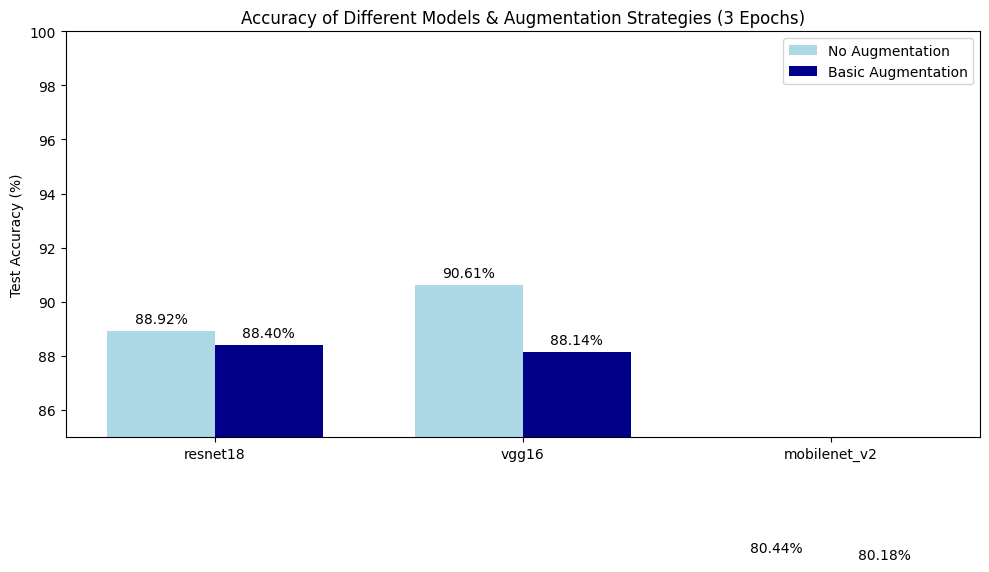


=== 🎯 最终结果汇总 ===

【resnet18】
  No Augmentation: 88.92%
  Basic Augmentation: 88.40%

【vgg16】
  No Augmentation: 90.61%
  Basic Augmentation: 88.14%

【mobilenet_v2】
  No Augmentation: 80.44%
  Basic Augmentation: 80.18%


In [1]:
# ====================== 环境验证（第一步） ======================
import sys
import os
import numpy
print("=== 验证Python环境 ===")
print(f"Python路径: {sys.executable}")

# 逐个验证核心库
try:
    import numpy
    print(f"✅ numpy: {numpy.__version__}")
except ImportError:
    print("❌ numpy未安装！执行: conda install numpy")
    sys.exit(1)

try:
    import cv2
    print(f"✅ OpenCV: {cv2.__version__}")
except ImportError:
    print("❌ OpenCV未安装！执行: pip install opencv-python")
    sys.exit(1)

try:
    import torch
    print(f"✅ PyTorch: {torch.__version__} (CUDA: {torch.cuda.is_available()})")
except ImportError:
    print("❌ PyTorch未安装！执行: pip install torch torchvision")
    sys.exit(1)

try:
    import albumentations as A
    from albumentations.pytorch import ToTensorV2
    print(f"✅ Albumentations: {A.__version__}")
except ImportError:
    print("❌ Albumentations未安装！执行: pip install albumentations==1.3.0")
    sys.exit(1)

# 其他必要库
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models
from torchvision.models import (
    ResNet18_Weights, VGG16_Weights, MobileNet_V2_Weights
)
from tqdm import tqdm

# ====================== 极简数据集类 ======================
class SimpleDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.img_paths = []
        self.labels = []
        # 加载makeup(0)/non-makeup(1)
        for label, cls in enumerate(['makeup', 'non-makeup']):
            cls_dir = os.path.join(root_dir, cls)
            if os.path.exists(cls_dir):
                for f in os.listdir(cls_dir):
                    if f.lower().endswith(('.jpg', '.png', '.jpeg')):
                        self.img_paths.append(os.path.join(cls_dir, f))
                        self.labels.append(label)
            else:
                print(f"⚠️  警告：{cls_dir} 目录不存在，请检查数据集路径！")

        self.transform = transform
        print(f"\n✅ 加载数据集：{len(self.img_paths)} 张图片")

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        # 加载图片（容错处理）
        img_path = self.img_paths[idx]
        img = cv2.imread(img_path)
        if img is None:
            img = numpy.zeros((224, 224, 3), dtype=numpy.uint8)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # 应用增强
        if self.transform:
            img = self.transform(image=img)['image']
        
        return img, self.labels[idx]

# ====================== 定义增强策略 ======================
IMG_HEIGHT = 224
IMG_WIDTH = 224
# 归一化参数
norm = A.Normalize(
    mean=[0.485, 0.456, 0.406], 
    std=[0.229, 0.224, 0.225],
    max_pixel_value=255.0
)

# 策略1：无增强
no_aug = A.Compose([
    A.Resize(height=IMG_HEIGHT, width=IMG_WIDTH),
    norm,
    ToTensorV2()
])

# 策略2：基础增强
basic_aug = A.Compose([
    A.RandomResizedCrop(height=IMG_HEIGHT, width=IMG_WIDTH, scale=(0.8, 1.0)),
    A.Rotate(limit=10),
    norm,
    ToTensorV2()
])

# ====================== 模型加载函数 ======================
def load_pretrained_model(model_name, num_classes=2):
    """
    加载预训练模型并替换分类头
    model_name: resnet18 / vgg16 / mobilenet_v2
    """
    if model_name == "resnet18":
        model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == "vgg16":
        model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
    elif model_name == "mobilenet_v2":
        model = models.mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError(f"不支持的模型：{model_name}，可选：resnet18/vgg16/mobilenet_v2")
    
    # 冻结主干，解冻分类头
    for param in model.parameters():
        param.requires_grad = False
    if model_name == "resnet18":
        for param in model.fc.parameters():
            param.requires_grad = True
    elif model_name == "vgg16":
        for param in model.classifier[-1].parameters():
            param.requires_grad = True
    elif model_name == "mobilenet_v2":
        for param in model.classifier[1].parameters():
            param.requires_grad = True
    
    return model

# ====================== 训练评估函数（核心修改：轮数改回3） ======================
def train_eval(transform, name, model_name, device, data_root):
    # 加载数据集
    dataset = SimpleDataset(data_root, transform=transform)
    if len(dataset) < 5:
        print(f"❌ 跳过 {name}（{model_name}）：样本数不足")
        return 0, numpy.zeros((2,2))
    
    # 划分数据集
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_set, test_set = random_split(dataset, [train_size, test_size])
    
    # 创建DataLoader
    train_loader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_set, batch_size=8, shuffle=False, num_workers=0)
    
    # 加载模型
    model = load_pretrained_model(model_name)
    model = model.to(device)
    
    # 训练配置
    criterion = nn.CrossEntropyLoss()
    if model_name == "mobilenet_v2":
        optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), 
                              lr=0.005, momentum=0.9)
    else:
        optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), 
                              lr=0.001, momentum=0.9)
    
    # 核心修改：训练轮数从10改回3
    print(f"\n🚀 开始训练 {name}（{model_name}）...")
    model.train()
    for epoch in range(3):  # 关键改动：10 → 3
        for imgs, labels in tqdm(train_loader, desc=f"{name} {model_name} Epoch {epoch+1}/3"):
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    # 评估
    print(f"📊 评估 {name}（{model_name}）...")
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # 计算指标
    acc = accuracy_score(all_labels, all_preds) * 100
    cm = confusion_matrix(all_labels, all_preds, labels=[0,1])
    
    # 绘制混淆矩阵
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['makeup', 'non-makeup'],
                yticklabels=['makeup', 'non-makeup'])
    plt.title(f"{name} ({model_name})\nAccuracy: {acc:.2f}%")
    plt.tight_layout()
    plt.savefig(f"cm_{name.replace(' ', '_')}_{model_name}.png")
    plt.close()
    
    return acc, cm

# ====================== 主程序 ======================
if __name__ == "__main__":
    # 环境配置
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    DATA_ROOT = "MT-Dataset/images"  # 替换为你的数据集实际路径
    
    # 打印版本信息
    print("\n=== 最终环境信息 ===")
    print(f"Albumentations: {A.__version__}")
    print(f"NumPy: {numpy.__version__}")
    print(f"PyTorch: {torch.__version__}")
    print(f"Device: {DEVICE}")
    
    # 检查数据集路径是否存在
    if not os.path.exists(DATA_ROOT):
        print(f"\n❌ 错误：数据集路径 {DATA_ROOT} 不存在！")
        print("请确保路径下有 'makeup' 和 'non-makeup' 两个子目录")
        sys.exit(1)
    
    # 定义要对比的模型和增强策略
    models_to_test = ["resnet18", "vgg16", "mobilenet_v2"]
    strategies = [
        ("No Augmentation", no_aug),
        ("Basic Augmentation", basic_aug)
    ]
    
    # 存储所有结果
    all_results = {}
    
    # 遍历所有模型和增强策略
    for model_name in models_to_test:
        all_results[model_name] = {}
        for strat_name, transform in strategies:
            acc, _ = train_eval(transform, strat_name, model_name, DEVICE, DATA_ROOT)
            all_results[model_name][strat_name] = acc
            print(f"✅ {model_name} - {strat_name} 准确率: {acc:.2f}%\n")
    
    # 绘制多模型准确率对比图
    plt.figure(figsize=(10,6))
    x = numpy.arange(len(models_to_test))
    width = 0.35
    strat1_accs = [all_results[m]["No Augmentation"] for m in models_to_test]
    strat2_accs = [all_results[m]["Basic Augmentation"] for m in models_to_test]
    
    plt.bar(x - width/2, strat1_accs, width, label="No Augmentation", color='lightblue')
    plt.bar(x + width/2, strat2_accs, width, label="Basic Augmentation", color='darkblue')
    
    plt.ylabel("Test Accuracy (%)")
    plt.title("Accuracy of Different Models & Augmentation Strategies (3 Epochs)")
    plt.xticks(x, models_to_test)
    plt.ylim(85, 100)
    plt.legend()
    
    # 添加数值标签
    for i, (a1, a2) in enumerate(zip(strat1_accs, strat2_accs)):
        plt.text(i - width/2, a1+0.3, f"{a1:.2f}%", ha='center')
        plt.text(i + width/2, a2+0.3, f"{a2:.2f}%", ha='center')
    
    plt.tight_layout()
    plt.savefig("multi_model_accuracy_comparison_3epochs.png")
    plt.show()
    
    # 打印最终结果汇总
    print("\n=== 🎯 最终结果汇总 ===")
    for model_name in models_to_test:
        print(f"\n【{model_name}】")
        for strat_name, acc in all_results[model_name].items():
            print(f"  {strat_name}: {acc:.2f}%")

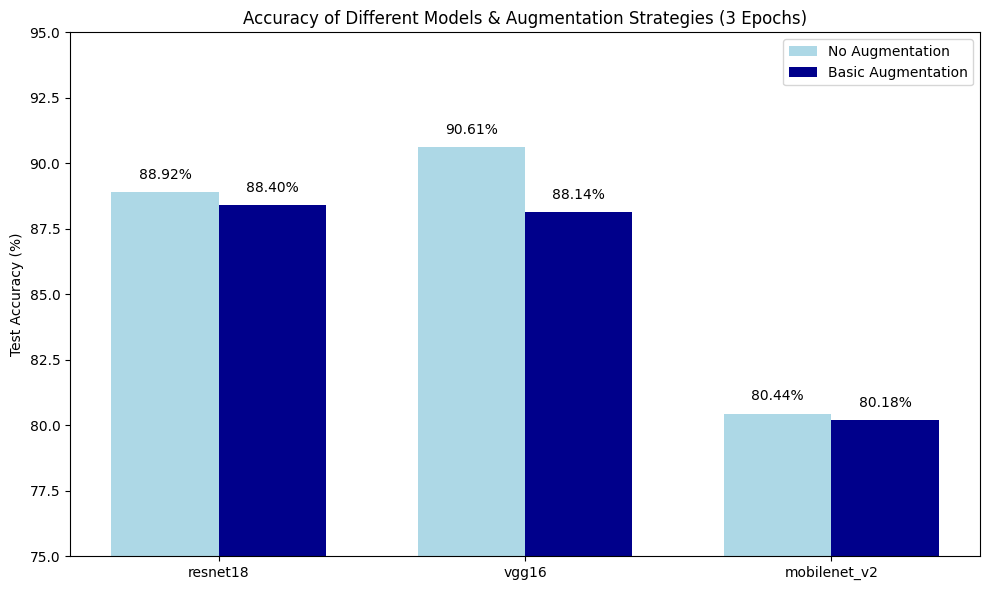

In [3]:
# 主程序中绘制图表的部分，替换为以下代码：
plt.figure(figsize=(10,6))
x = numpy.arange(len(models_to_test))
width = 0.35

# 1. 强制检查数据（避免长度不匹配）
strat1_accs = []
strat2_accs = []
for m in models_to_test:
    # 若数据缺失，用0填充（避免报错）
    strat1_accs.append(all_results[m].get("No Augmentation", 0))
    strat2_accs.append(all_results[m].get("Basic Augmentation", 0))

# 2. 绘制柱状图（明确指定每个柱子的位置和数值）
plt.bar(x - width/2, strat1_accs, width, label="No Augmentation", color='lightblue')
plt.bar(x + width/2, strat2_accs, width, label="Basic Augmentation", color='darkblue')

# 3. 调整y轴范围（包含MobileNetV2的80%左右准确率）
plt.ylabel("Test Accuracy (%)")
plt.title("Accuracy of Different Models & Augmentation Strategies (3 Epochs)")
plt.xticks(x, models_to_test)
plt.ylim(75, 95)  # 关键：把y轴下限调低，确保MobileNetV2的柱子能显示
plt.legend()

# 4. 重新添加数值标签（确保每个柱子都有标签）
for i, (a1, a2) in enumerate(zip(strat1_accs, strat2_accs)):
    plt.text(i - width/2, a1 + 0.5, f"{a1:.2f}%", ha='center')
    plt.text(i + width/2, a2 + 0.5, f"{a2:.2f}%", ha='center')

plt.tight_layout()
plt.savefig("multi_model_accuracy_comparison_3epochs.png")
plt.show()